# **1. Data Preprocessing and Exploration**

---



In [110]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## Importing Libraries





In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the concrete dataset.

In [112]:
# Loading the dataset
df = pd.read_csv('/content/Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##Check total rows and columns of the dataset.





In [113]:
num_rows, num_columns = df.shape
print(f'Total Rows: {num_rows}')
print(f'Total Columns: {num_columns}')

Total Rows: 1030
Total Columns: 9


##   Check basic information and missing values in the dataset.


In [114]:
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


##Missing values

In [115]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


## Now visualizing the data distributions using histograms and pairplots.


In [116]:
print("\nVisualizing Data Distributions:")
print(df.describe())


Visualizing Data Distributions:
            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.

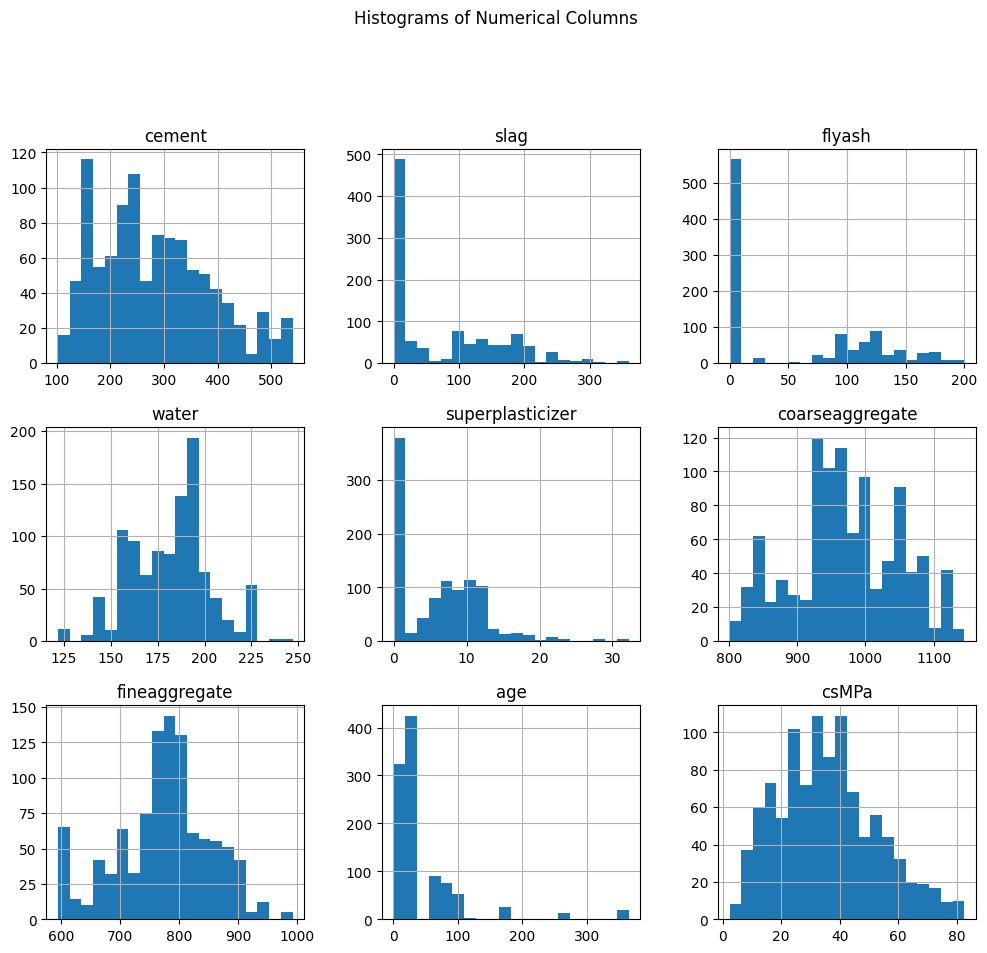

In [117]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

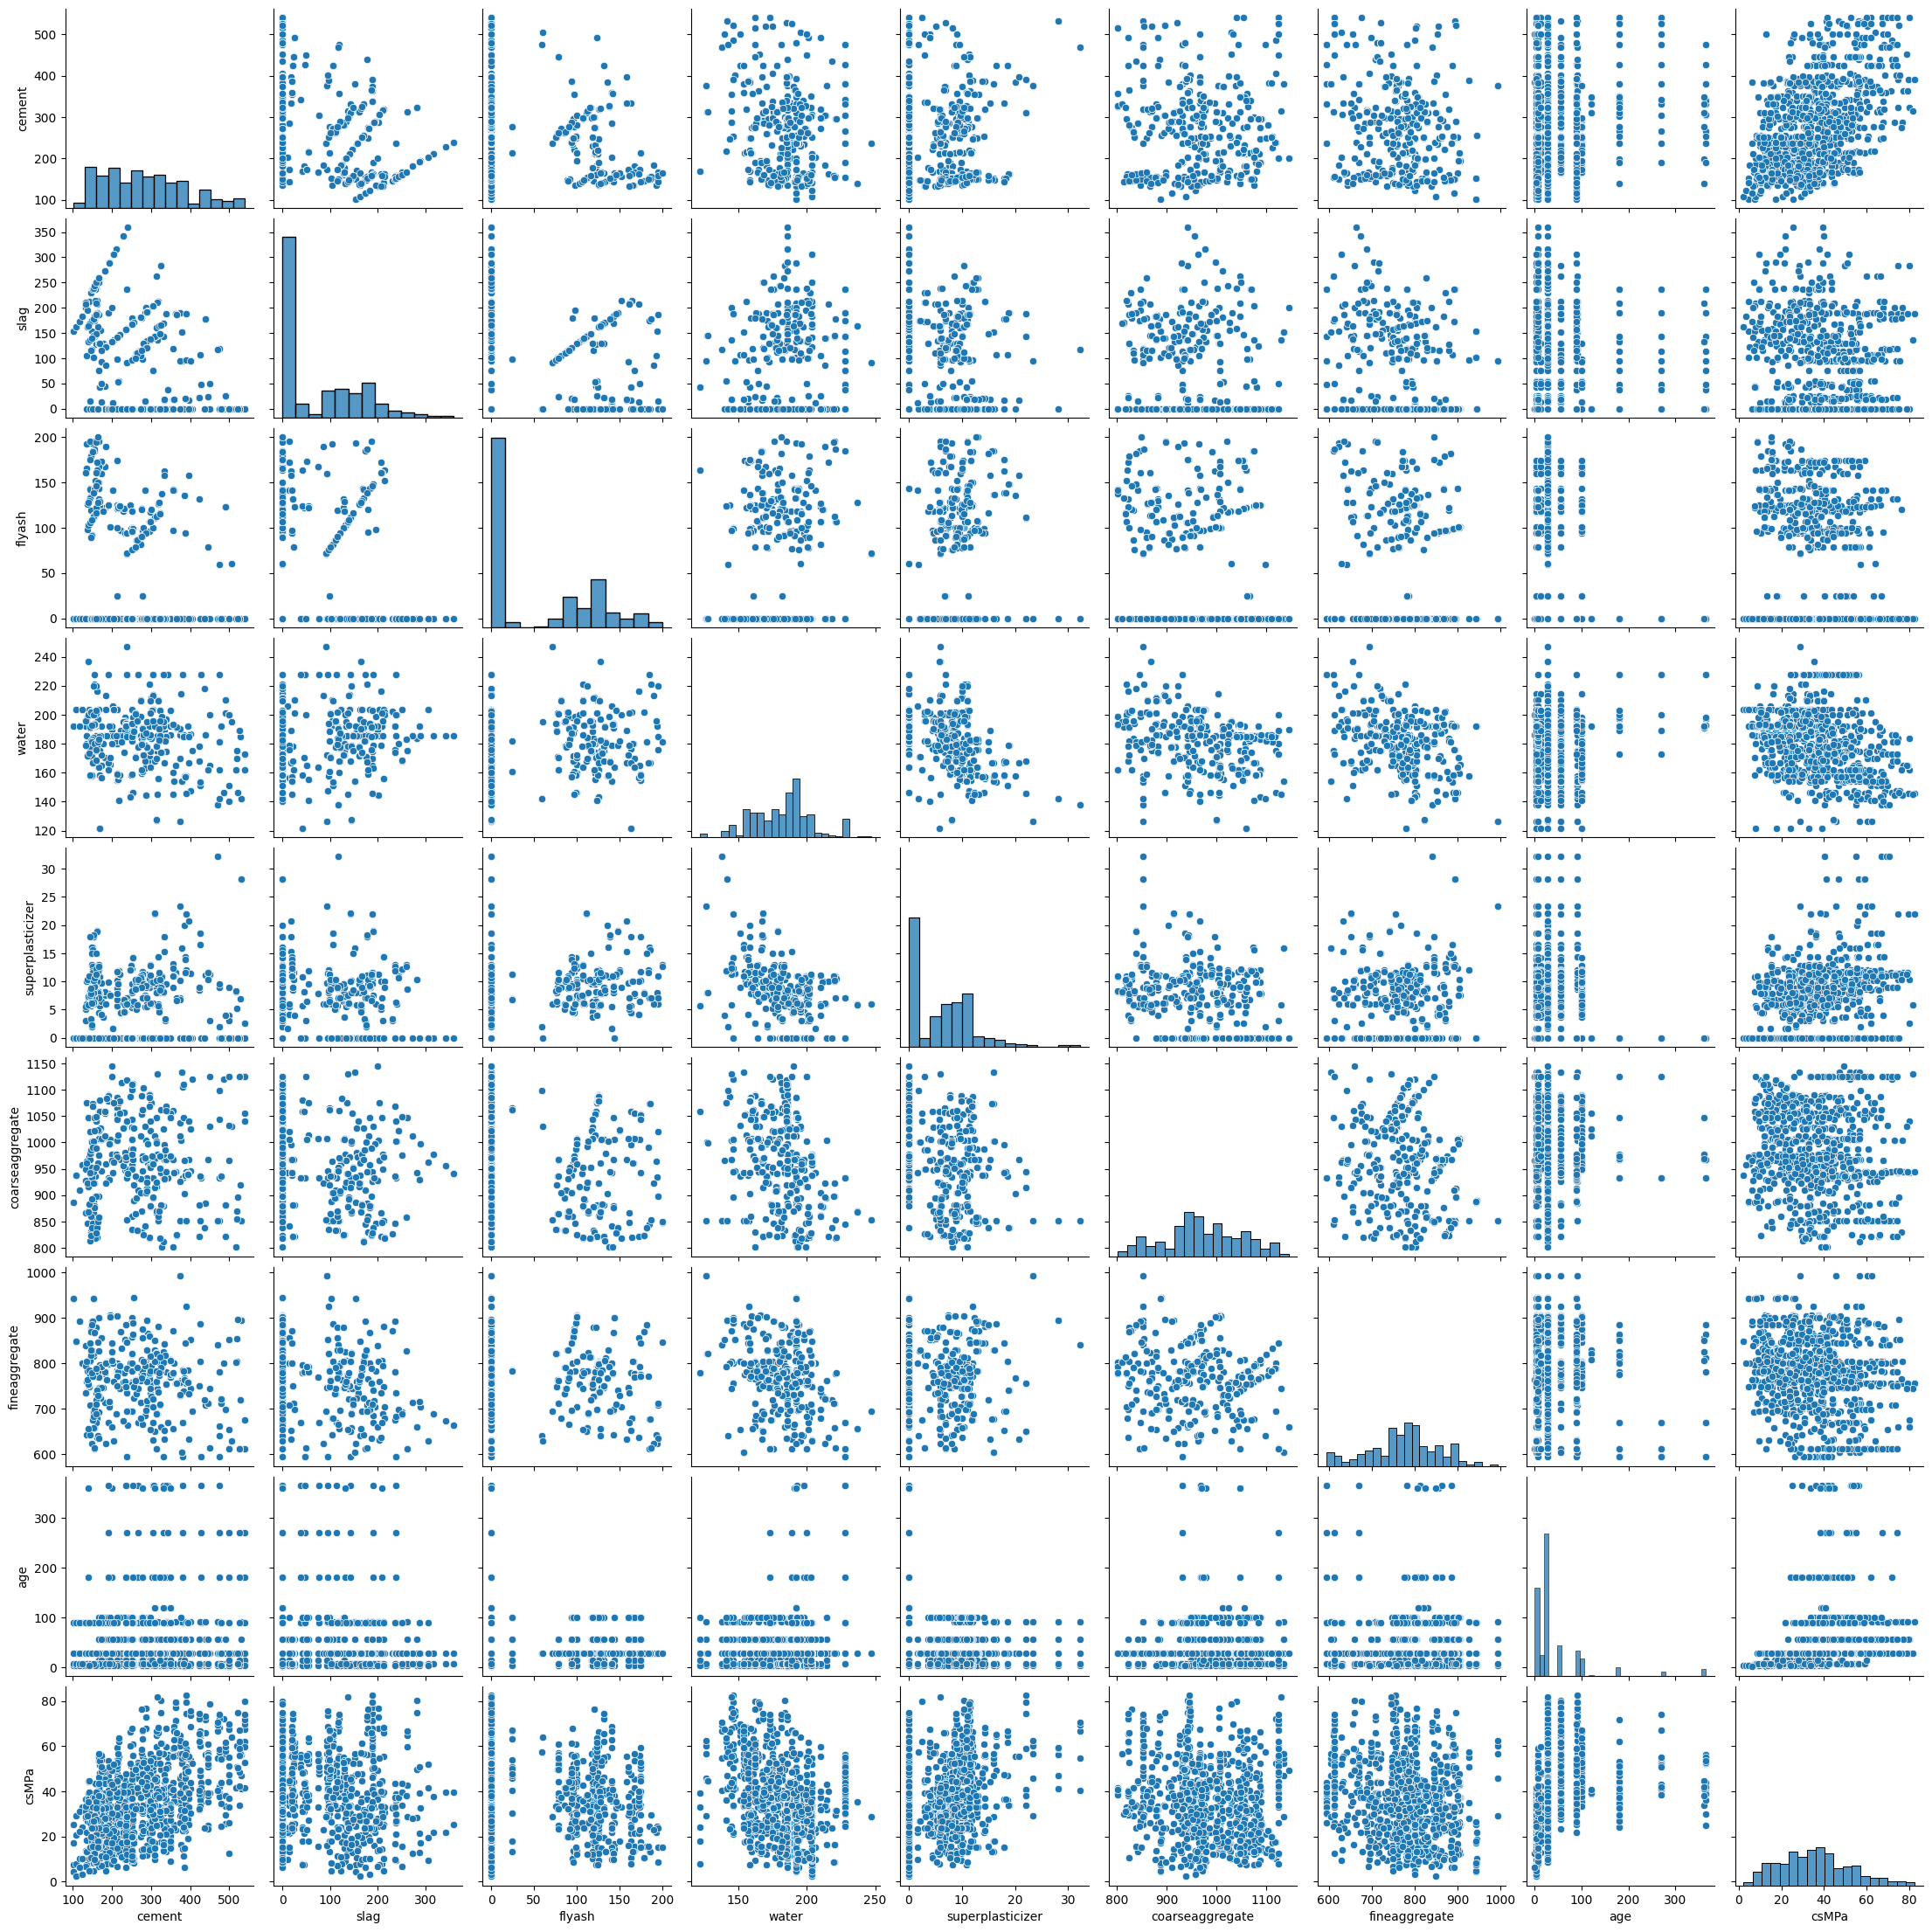

In [118]:
sns.pairplot(df)
plt.show()

## Explore relationships through scatter plots and a correlation matrix heatmap.

###1) Scatter Plot



Text(0.5, 0, 'cement')

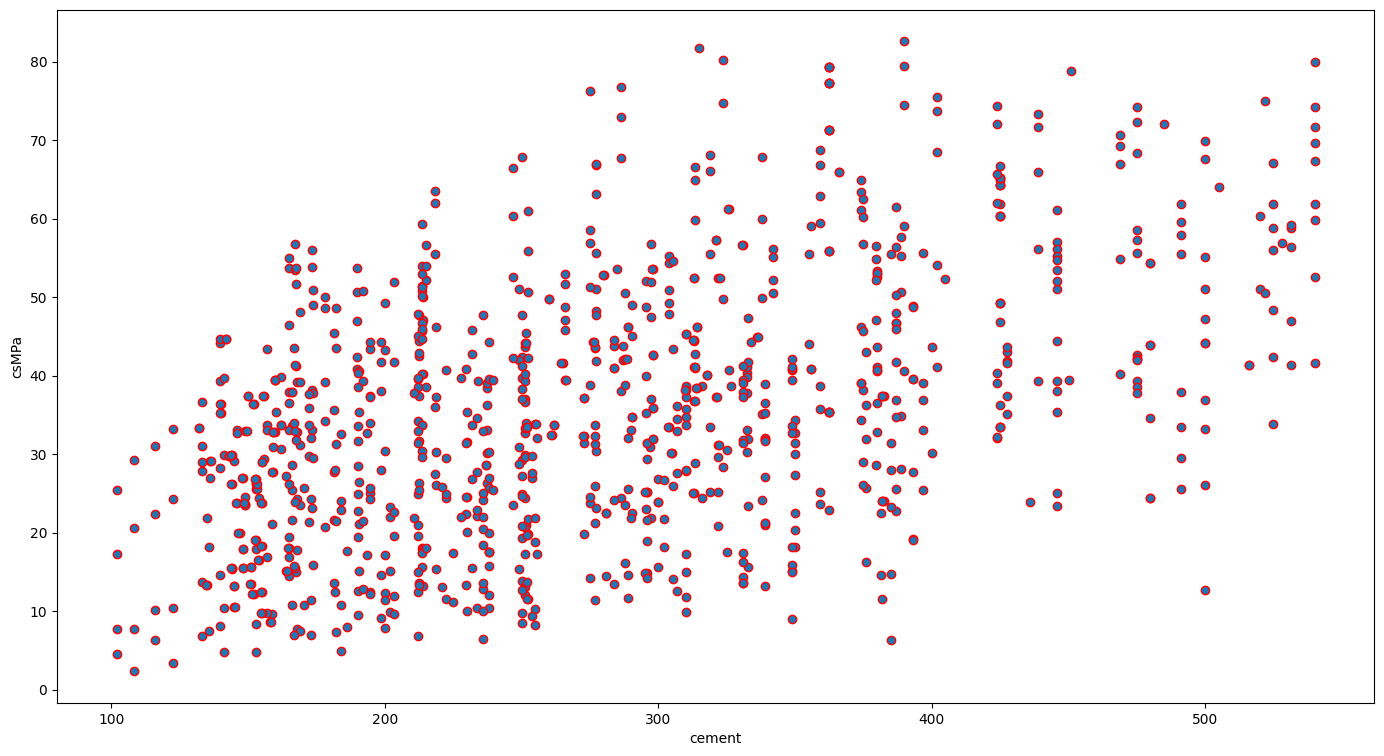

In [119]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='cement',edgecolors='red',data=df)
plt.ylabel('csMPa')
plt.xlabel('cement')

### Scatter plot between csMPa and flyash:


Text(0.5, 0, 'flyash')

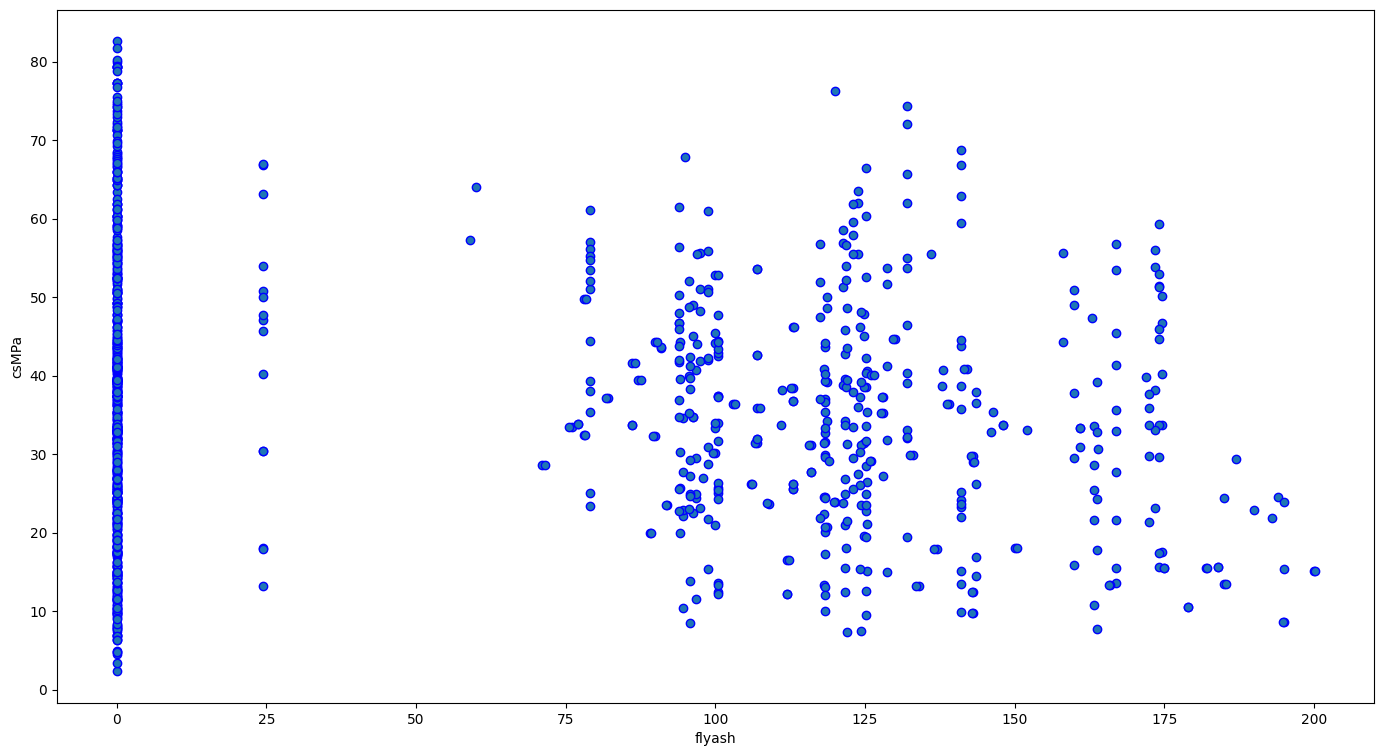

In [120]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='flyash',edgecolors='blue',data=df)
plt.ylabel('csMPa')
plt.xlabel('flyash')

### 2) Correlation Maatrix Heatmap

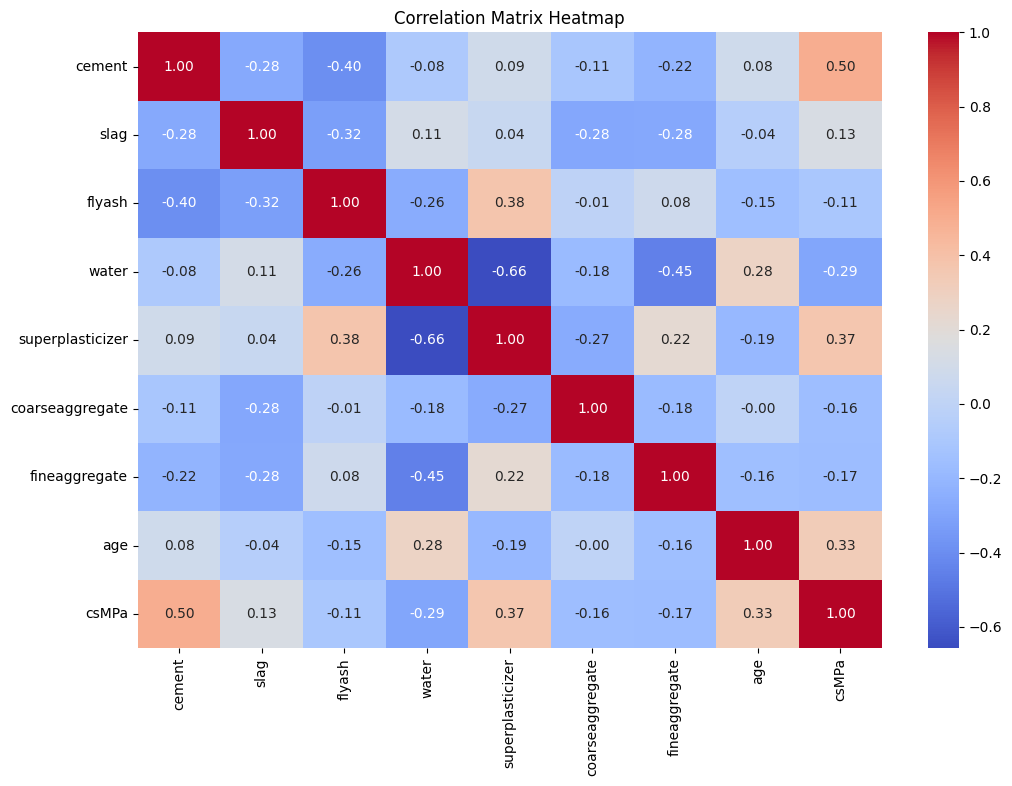

In [121]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

##    Identify and visualize outliers using boxplots.


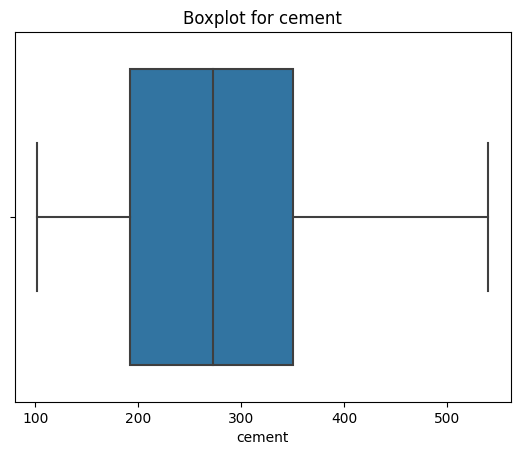

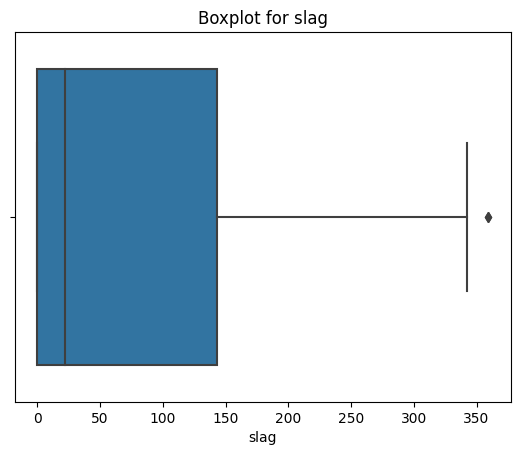

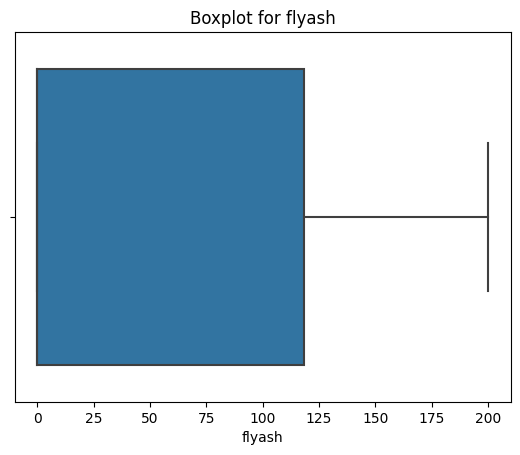

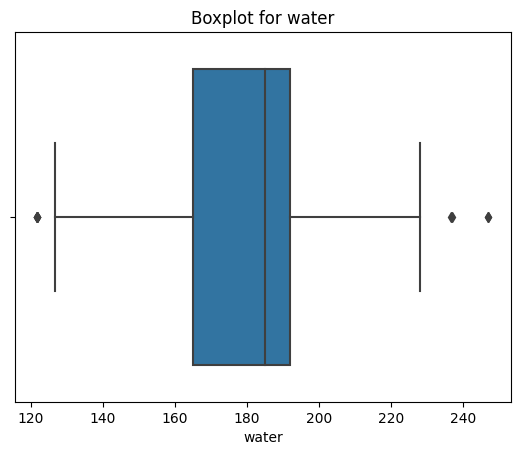

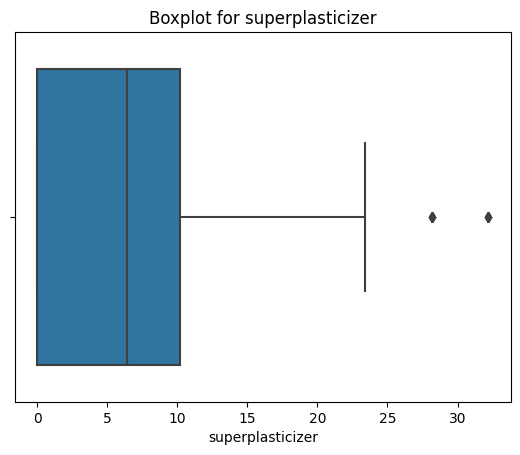

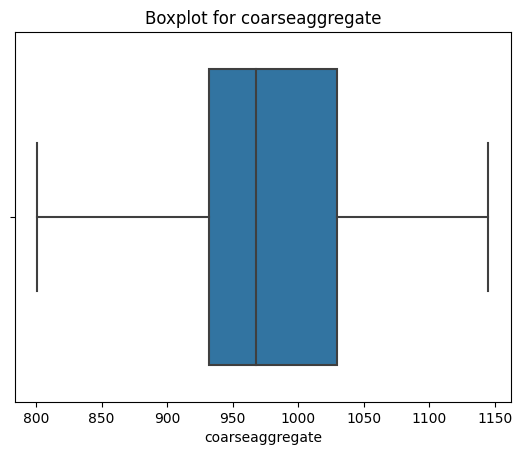

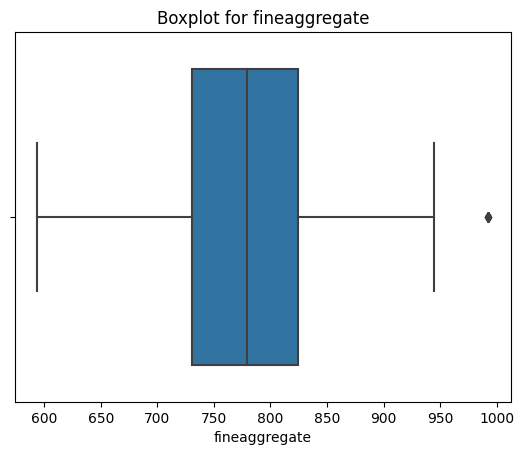

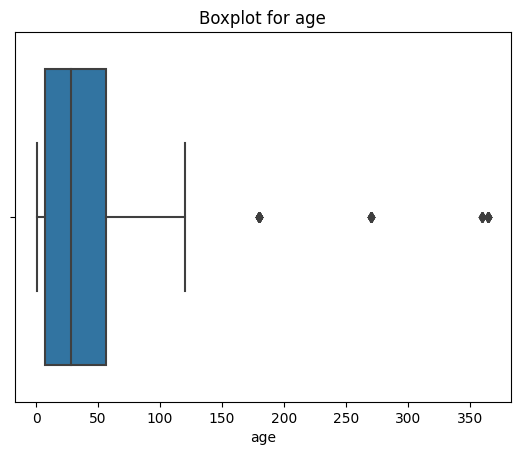

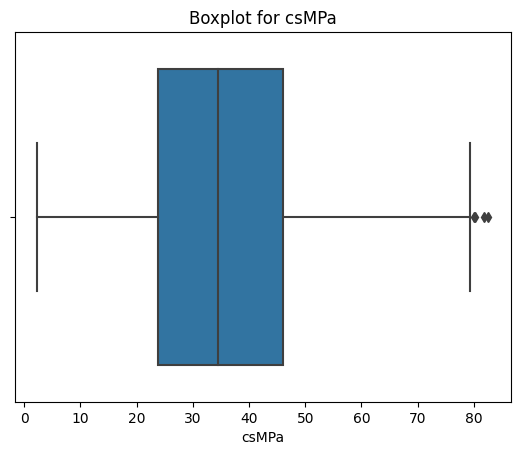

In [122]:
columns_to_plot = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']
for column in columns_to_plot:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# 2. Data Preparation for Modeling

##    Identify and handle categorical columns.


In [123]:
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print(f'Categorical columns: {", ".join(categorical_columns)}')
else:
    print('No categorical columns found.')

No categorical columns found.


##    Split the dataset into independent variables (features) and dependent variable (compressive strength).


In [124]:
x = df.drop(['csMPa'],axis=1)
y = df['csMPa']

## Split the data into training and testing sets.
   

In [125]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

## Standardizing the feature data using StandardScaler.

In [126]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

##  Linear Regression Model
   - Train a Linear Regression model.
   - Evaluate the model's performance using R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
   - Visualize the predicted vs. actual values.

Predicted score = 0.627553179231485
Mean Squared Error(MSE) = 95.97094009110683
Root Mean Squared Error(RMSE) = 9.79647590162436


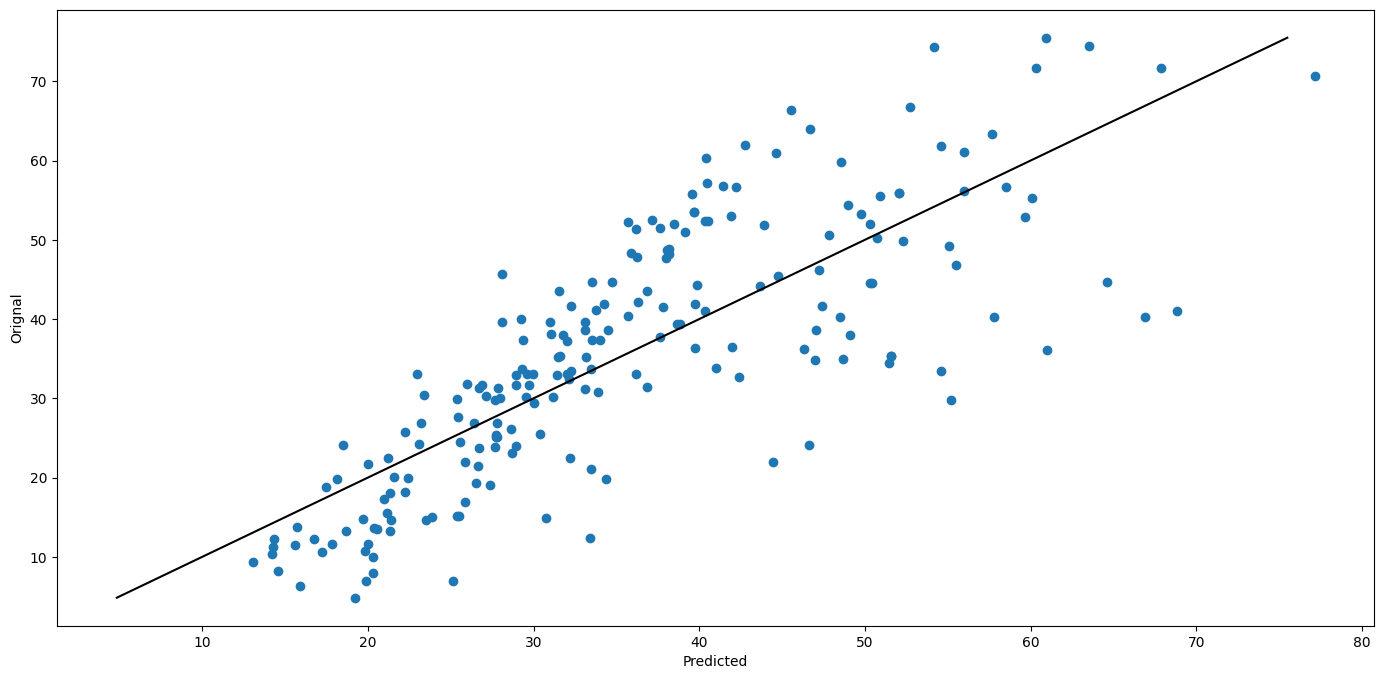

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('Predicted score = {}'.format(score))
y_predict = lr.predict(xtest_scl)
print('Mean Squared Error(MSE) =',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict))
print('Root Mean Squared Error(RMSE) = {}'.format(rms))
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='black')
plt.xlabel('Predicted')
plt.ylabel('Orignal')
plt.show()

In [128]:
pd.DataFrame({'Original Values': ytest, 'Predicted Values': y_predict})

,Original Values,Predicted Values
31,52.91,59.658042
109,55.90,52.041211
136,74.50,63.535133
88,35.30,51.575457
918,10.54,17.220017
...,...,...
482,56.14,55.987586
545,18.75,17.479621
110,38.00,49.086522
514,74.36,54.181552


##  Ridge and Lasso Regression Models
   - Train a Ridge Regression and Lasso Regression model.
   - Then implement those models with hyperparameter tuning.
   - Assess the performance of the models and compare them.

In [129]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain_scl,ytrain)
fit_ls = ls.fit(xtrain_scl,ytrain)
print('Score of Ridge Regression: {}'.format(rd.score(xtest_scl, ytest)))
print('Score of Lasso Regression: {}'.format(ls.score(xtest_scl, ytest)))
print('Mean Squared Error of Ridge Regression: {}'.format(mean_squared_error(ytest, rd.predict(xtest_scl))))
print('Mean Squared Error of Lasso Regression: {}'.format(mean_squared_error(ytest, ls.predict(xtest_scl))))
print('Root Mean Squared Error of Ridge Regression: {}'.format(np.sqrt(mean_squared_error(ytest, rd.predict(xtest_scl)))))
print('Root Mean Squared Error of Lasso Regression: {}'.format(np.sqrt(mean_squared_error(ytest, lr.predict(xtest_scl)))))

Score of Ridge Regression: 0.6275685515574205
Score of Lasso Regression: 0.6176529832018642
Mean Squared Error of Ridge Regression: 95.96697899790061
Mean Squared Error of Lasso Regression: 98.52199185760712
Root Mean Squared Error of Ridge Regression: 9.796273730245629
Root Mean Squared Error of Lasso Regression: 9.79647590162436


## Ridge Regression

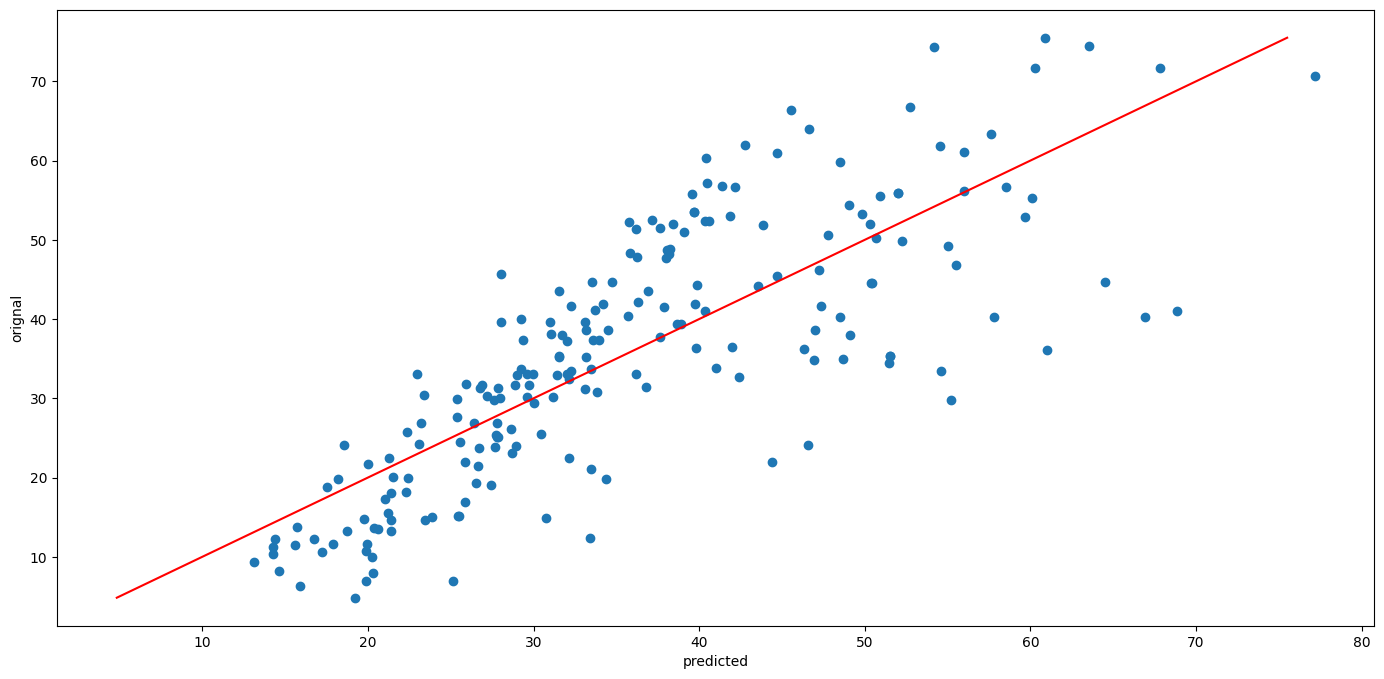

In [130]:
plt.figure(figsize=[17,8])
plt.scatter(rd.predict(xtest_scl), ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [131]:
pd.DataFrame({'Original Values': ytest, 'Predicted Values': rd.predict(xtest_scl)})

,Original Values,Predicted Values
31,52.91,59.660040
109,55.90,52.012528
136,74.50,63.534893
88,35.30,51.547279
918,10.54,17.227414
...,...,...
482,56.14,55.986924
545,18.75,17.514534
110,38.00,49.073842
514,74.36,54.196019


##Lasso Regression

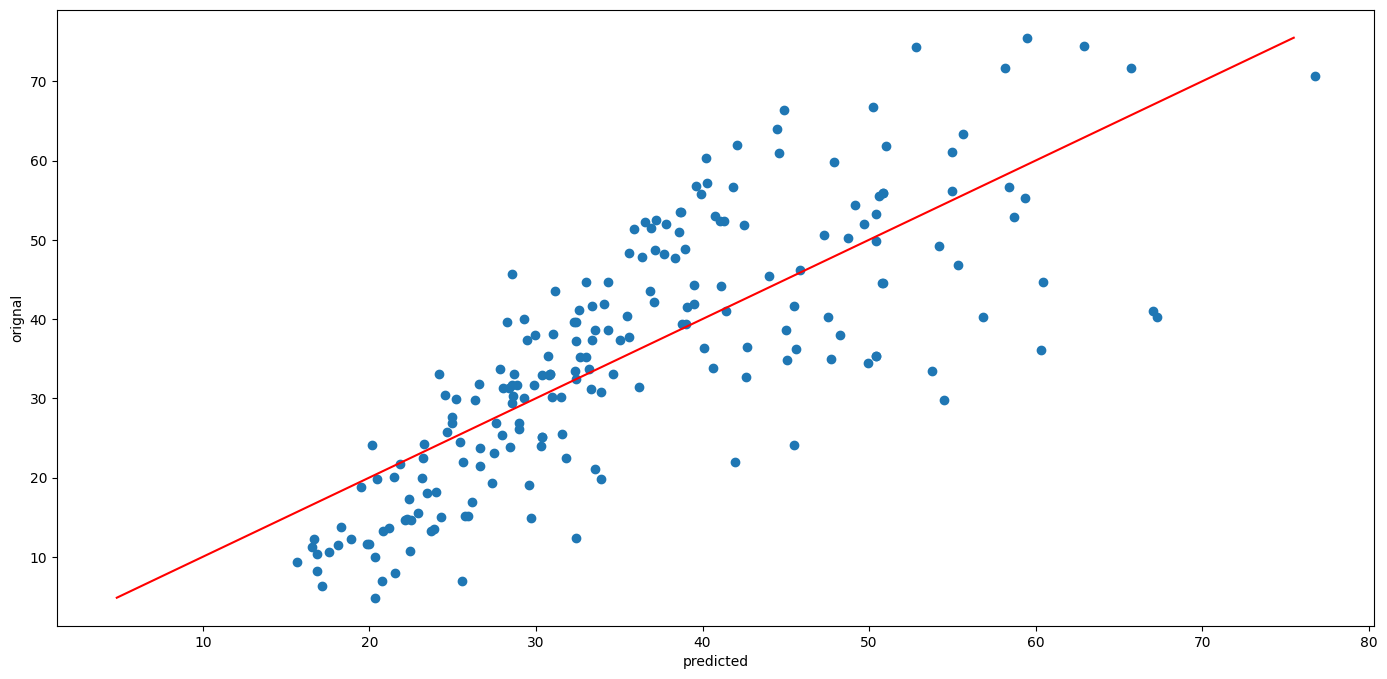

In [132]:
plt.figure(figsize=[17,8])
plt.scatter(ls.predict(xtest_scl), ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [133]:
pd.DataFrame({'Original Values': ytest, 'Predicted Values': ls.predict(xtest_scl)})

,Original Values,Predicted Values
31,52.91,58.729887
109,55.90,50.828082
136,74.50,62.912869
88,35.30,50.398473
918,10.54,17.601768
...,...,...
482,56.14,54.970632
545,18.75,19.520829
110,38.00,48.274398
514,74.36,52.820321


##  Random Forest Regression Model
   - Create and implement a Random Forest Regression model.
   - Evaluate the model's performance using R-squared, MSE, and RMSE.
   - Display a sample of predicted vs. actual values.

Predicted score = 0.878108587736674
Mean Squared Error = 31.408600561567642
Root Mean Squared Error = 5.604337655920425


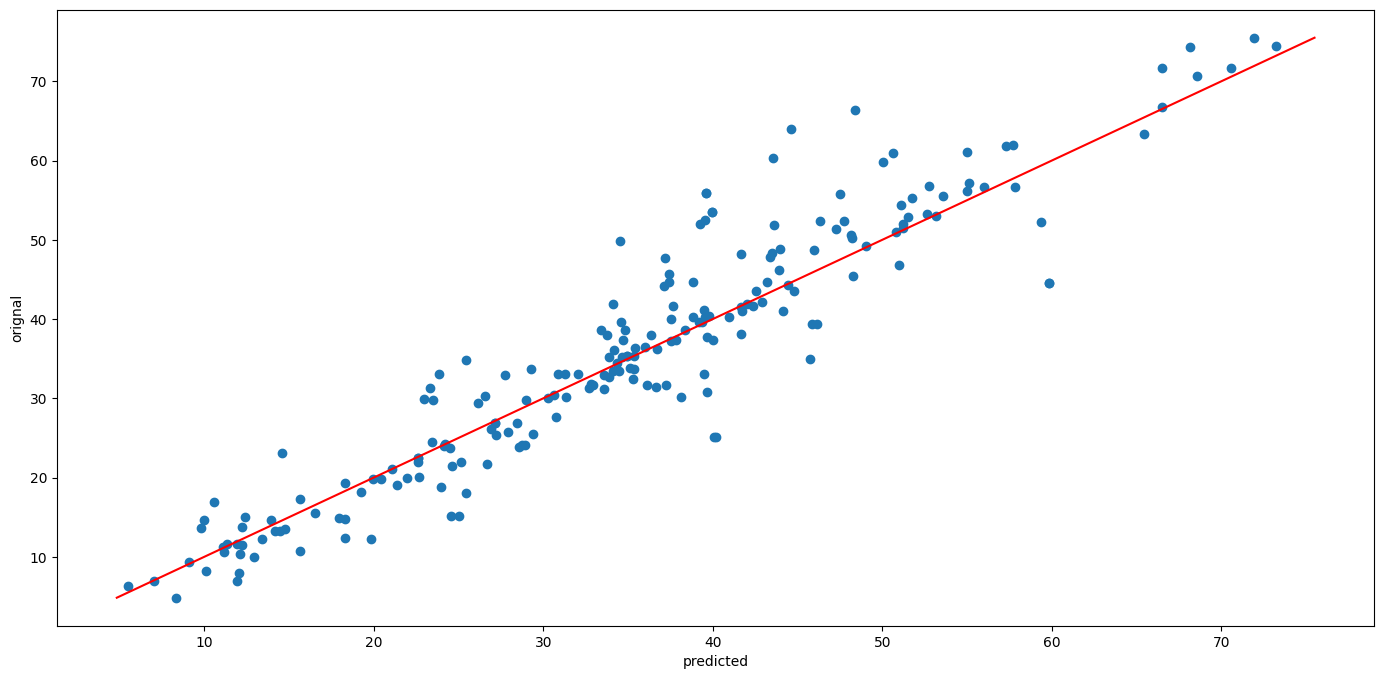

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain_scl,ytrain)
score = rnd.score(xtest_scl, ytest)
print('Predicted score = {}'.format(score))
mse = mean_squared_error(ytest, rnd.predict(xtest_scl))
print('Mean Squared Error = {}'.format(mse))
rmse = np.sqrt(mse)
print('Root Mean Squared Error = {}'.format(rmse))
plt.figure(figsize=[17,8])
plt.scatter(rnd.predict(xtest_scl), ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [135]:
pd.DataFrame({'Original Values': ytest, 'Predicted Values': rnd.predict(xtest_scl)})

,Original Values,Predicted Values
31,52.91,51.528500
109,55.90,39.585350
136,74.50,73.206800
88,35.30,34.905000
918,10.54,11.153600
...,...,...
482,56.14,54.990095
545,18.75,23.948600
110,38.00,33.738500
514,74.36,68.159100


#Decision Tree Regression
A Decision Tree Regressor model is created and implemented, and its performance is assessed and visualized.

In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
dt = DecisionTreeRegressor(random_state=42)
fit_dt = dt.fit(xtrain_scl, ytrain)
y_predict_dt = dt.predict(xtest_scl)
dt_mean_absolute_error = mean_absolute_error(ytest, y_predict_dt)
dt_mean_squared_error = mean_squared_error(ytest, y_predict_dt)
dtr2_score = r2_score(ytest, y_predict_dt)
print("Mean Absolute Error(MAE) is:", dt_mean_absolute_error)
print("Mean Squared Error(MSE) is:", dt_mean_squared_error)
print("The R2 Score:", dtr2_score)

Mean Absolute Error(MAE) is: 4.293786407766991
Mean Squared Error(MSE) is: 42.58102330097088
The R2 Score: 0.8347503240203619


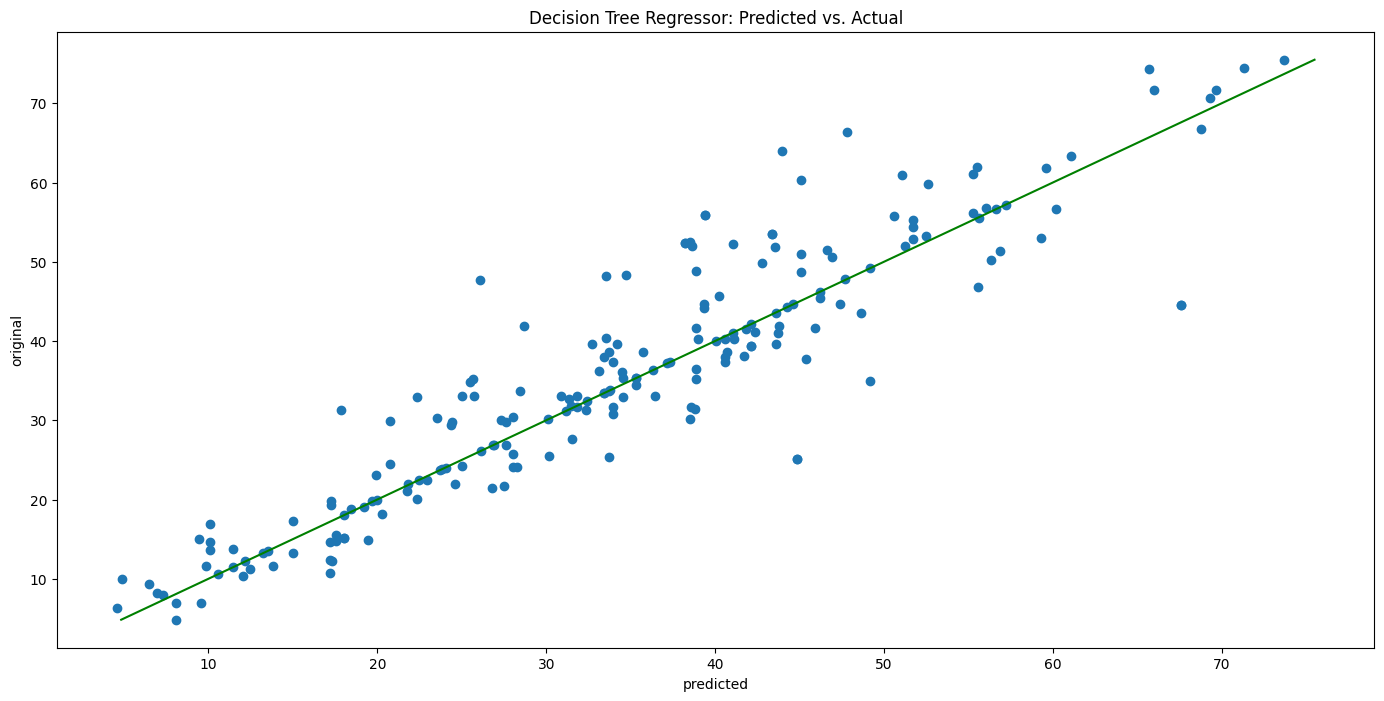

In [137]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict_dt, ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='green')
plt.xlabel('predicted')
plt.ylabel('original')
plt.title('Decision Tree Regressor: Predicted vs. Actual')
plt.show()

In [138]:
pd.DataFrame({'Actual': ytest, 'Predicted': y_predict_dt})

,Actual,Predicted
31,52.91,51.73
109,55.90,39.40
136,74.50,71.30
88,35.30,35.30
918,10.54,10.54
...,...,...
482,56.14,55.25
545,18.75,18.42
110,38.00,33.40
514,74.36,65.70


# Predicting the values through user input for concrete strength prediction

In [141]:
def predict_concrete_strength(input_data):
    input_df = pd.DataFrame([input_data])
    input_scl = Fit.transform(input_df)
    lr_prediction = lr.predict(input_scl)[0]
    rd_prediction = rd.predict(input_scl)[0]
    ls_prediction = ls.predict(input_scl)[0]
    rnd_prediction = rnd.predict(input_scl)[0]
    dt_prediction = dt.predict(input_scl)[0]
    predictions = {
        'Linear Regression Prediction': lr_prediction,
        'Ridge Regression Prediction': rd_prediction,
        'Lasso Regression Prediction': ls_prediction,
        'Random Forest Regression Prediction': rnd_prediction,
        'Decision Tree Regression Prediction' : dt_prediction
    }
    return predictions
user_input = {}
for column in x.columns:
    user_input[column] = float(input(f'Enter value for {column}: '))
user_predictions = predict_concrete_strength(user_input)
print('\nPredictions based on user input:')
for model, prediction in user_predictions.items():
    print(f'{model}: {prediction} csMPa')

Enter value for cement: 540
Enter value for slag: 0
Enter value for flyash: 0
Enter value for water: 162
Enter value for superplasticizer: 2.5
Enter value for coarseaggregate: 1040
Enter value for fineaggregate: 676
Enter value for age: 28

Predictions based on user input:
Linear Regression Prediction: 52.428410164277025 csMPa
Ridge Regression Prediction: 52.45010535993445 csMPa
Lasso Regression Prediction: 52.34448639994015 csMPa
Random Forest Regression Prediction: 73.32969999999999 csMPa
Decision Tree Regression Prediction: 79.99 csMPa
